  # 电影数据分析
  
  # 1. 熟悉数据
  * id：标识号
  * imdb_id：IMDB 标识号
  * popularity：在 Movie Database 上的相对页面查看次数
  * budget：预算（美元）
  * revenue：收入（美元）
  * original_title：电影名称
  * cast：演员列表，按 | 分隔，最多 5 名演员
  * homepage：电影首页的 URL
  * director：导演列表，按 | 分隔，最多 5 名导演
  * tagline：电影的标语
  * keywords：与电影相关的关键字，按 | 分隔，最多 5 个关键字
  * overview：剧情摘要
  * runtime：电影时长
  * genres：风格列表，按 | 分隔，最多 5 种风格
  * production_companies：制作公司列表，按 | 分隔，最多 5 家公司
  * release_date：首次上映日期
  * vote_count：评分次数
  * vote_average：平均评分
  * release_year：发行年份
  * budget_adj：根据通货膨胀调整的预算（2010 年，美元）
  * revenue_adj：根据通货膨胀调整的收入（2010 年，美元）

## 2. 使用的变量
* release_year
* genre
* buget
* revenue
* original_title
* production company
* popularity
* vote_average

## 3. 电影类型随着时代的变化
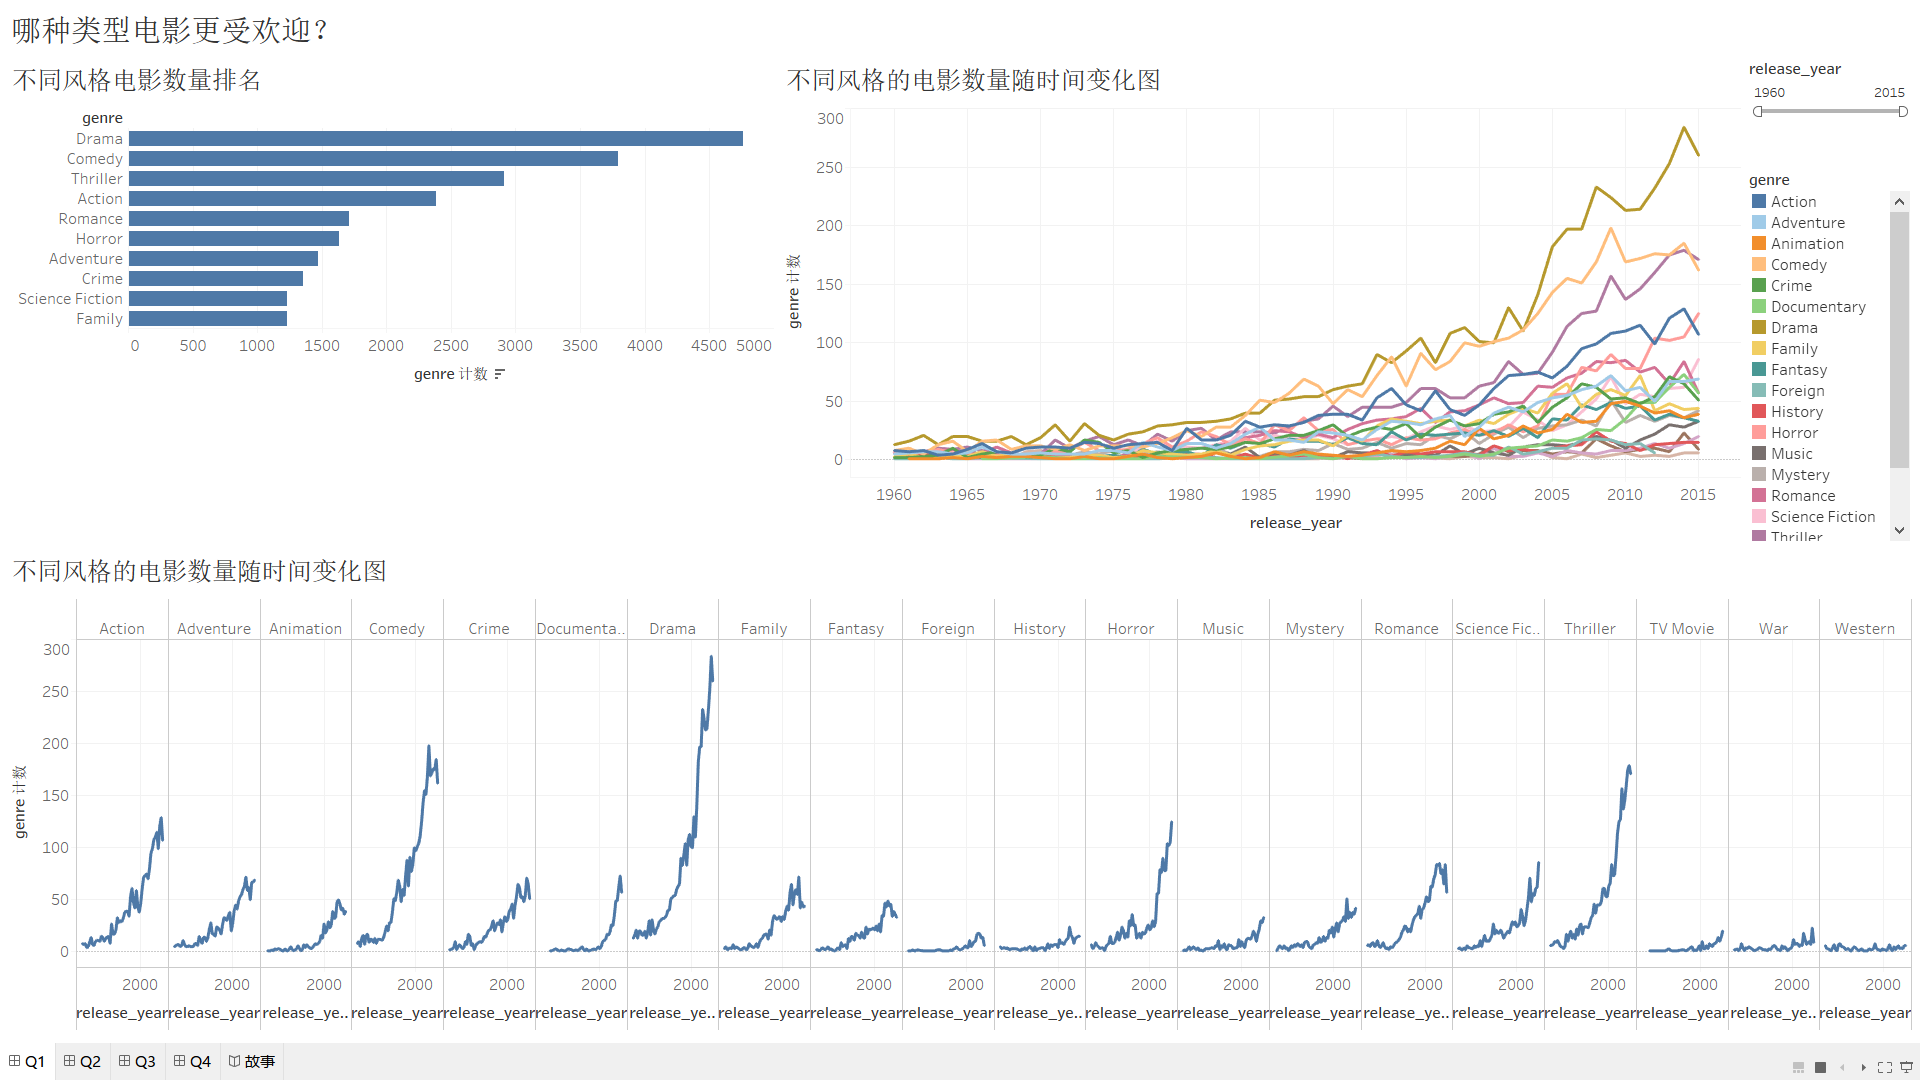
* a. 从1960年至2015年，出品电影种类数量前五依次是Drama，Comedy，Thriller，Action，Romance
* b. 剧情类和动作类长期是数量最多的两个类型，在2003年之前，数量几乎相当，剧情片略高一些。而2003年后，剧情片数量开始于第二名的动作片拉开差距。
* c. 从各个风格走势来看，剧情类一直处于高速增长状态，喜剧自1976年开始进入高速增长，纪录片。恐怖片和惊悚片从2004年开始数量急剧增加

## 4: 两大巨头环球影业和派拉蒙影业的电影之前数据指标有什么区别?
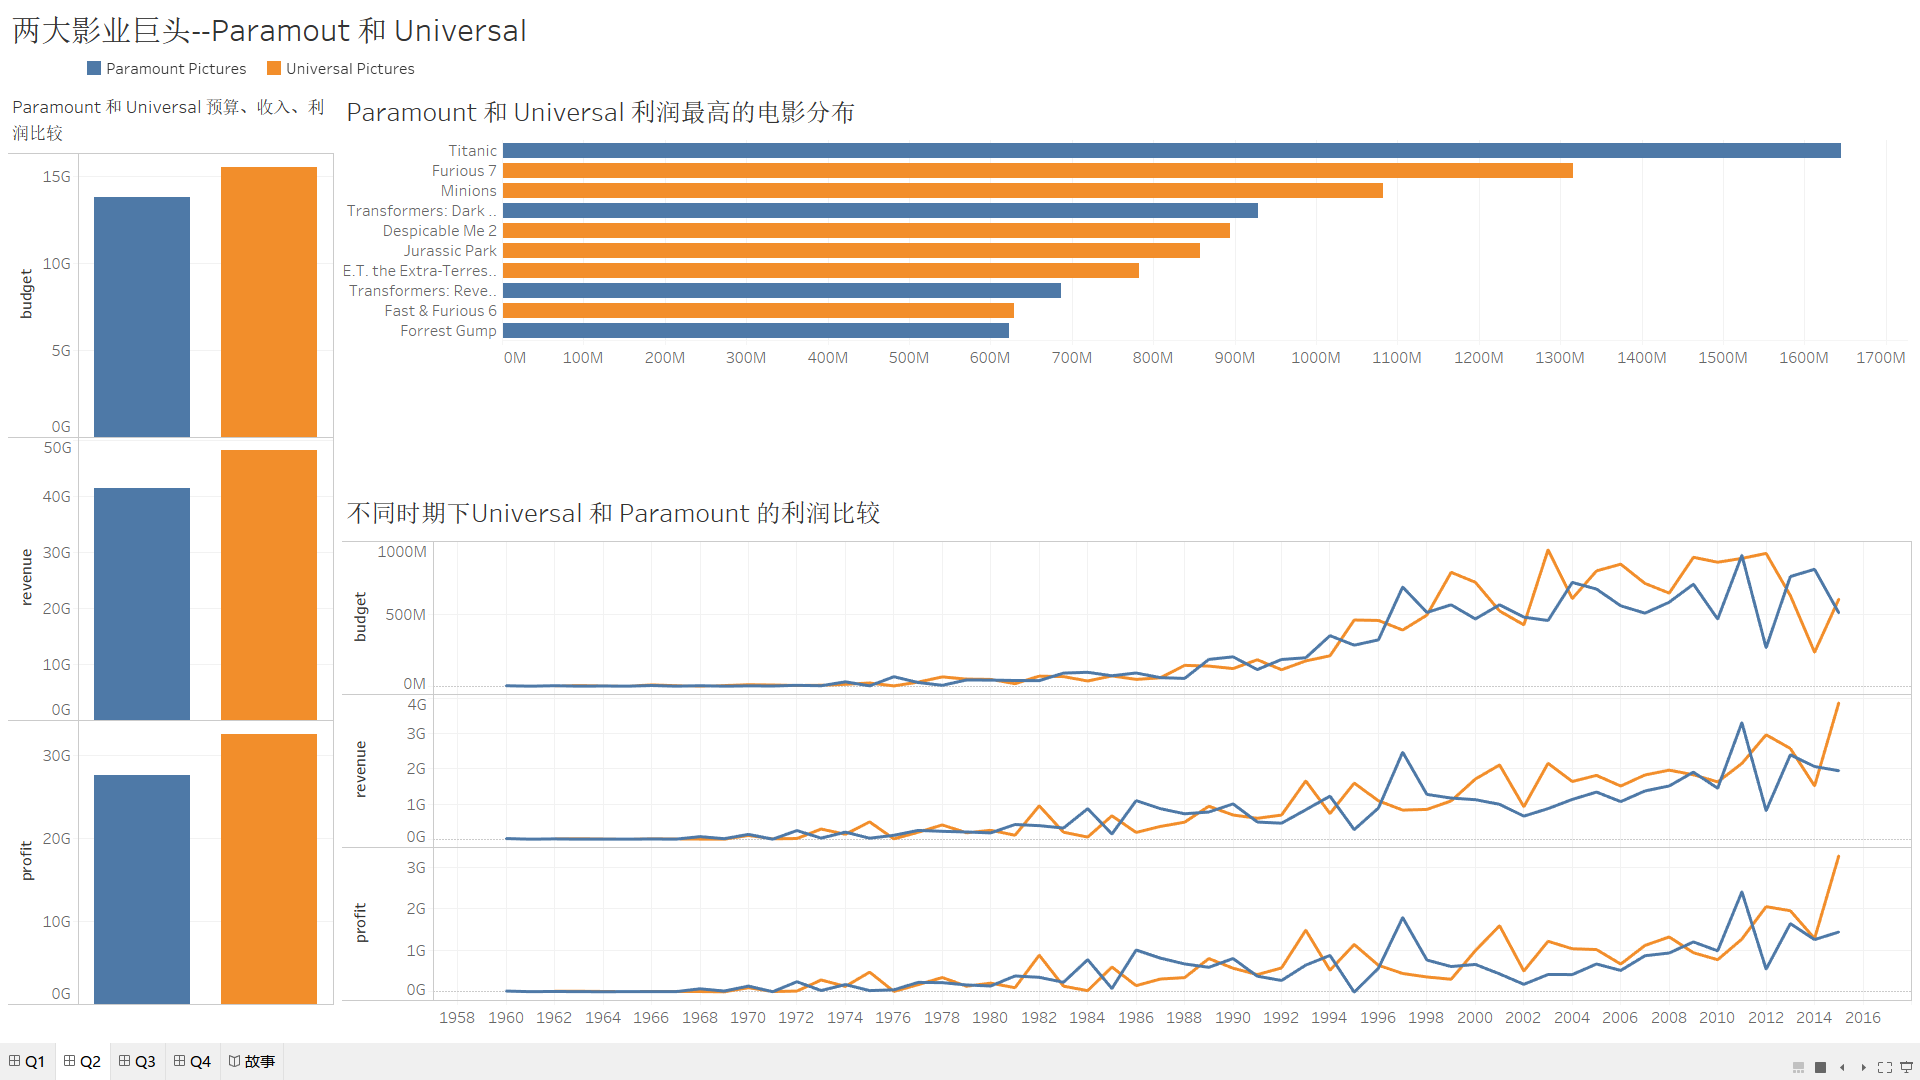
* a. 从总体看，1960-2015年，无论是出品量、预算还是收入、环球影业都要略高于派拉蒙影业；
* b. 从时间维度看，在20世纪90年代前，两家公司数据指标不相伯仲，90年代中后期到2011年，环球影业开始投入预算开始大幅超派拉蒙。并且收入和影响力也在这段时间超过了派拉蒙，2011年至2015年派拉蒙开始在预算上追赶，两家公司数据又进入胶着状态
* c. 在两家公司收入靠前的影片中，派拉蒙收入最高的影片是Titanic，环球影业收入最高的是Furious 7, 整体看，环球影业高收入的影片略多于派拉蒙

## 5. 和非小说改编的电影相比，基于小说改编的电影表现得怎么样?
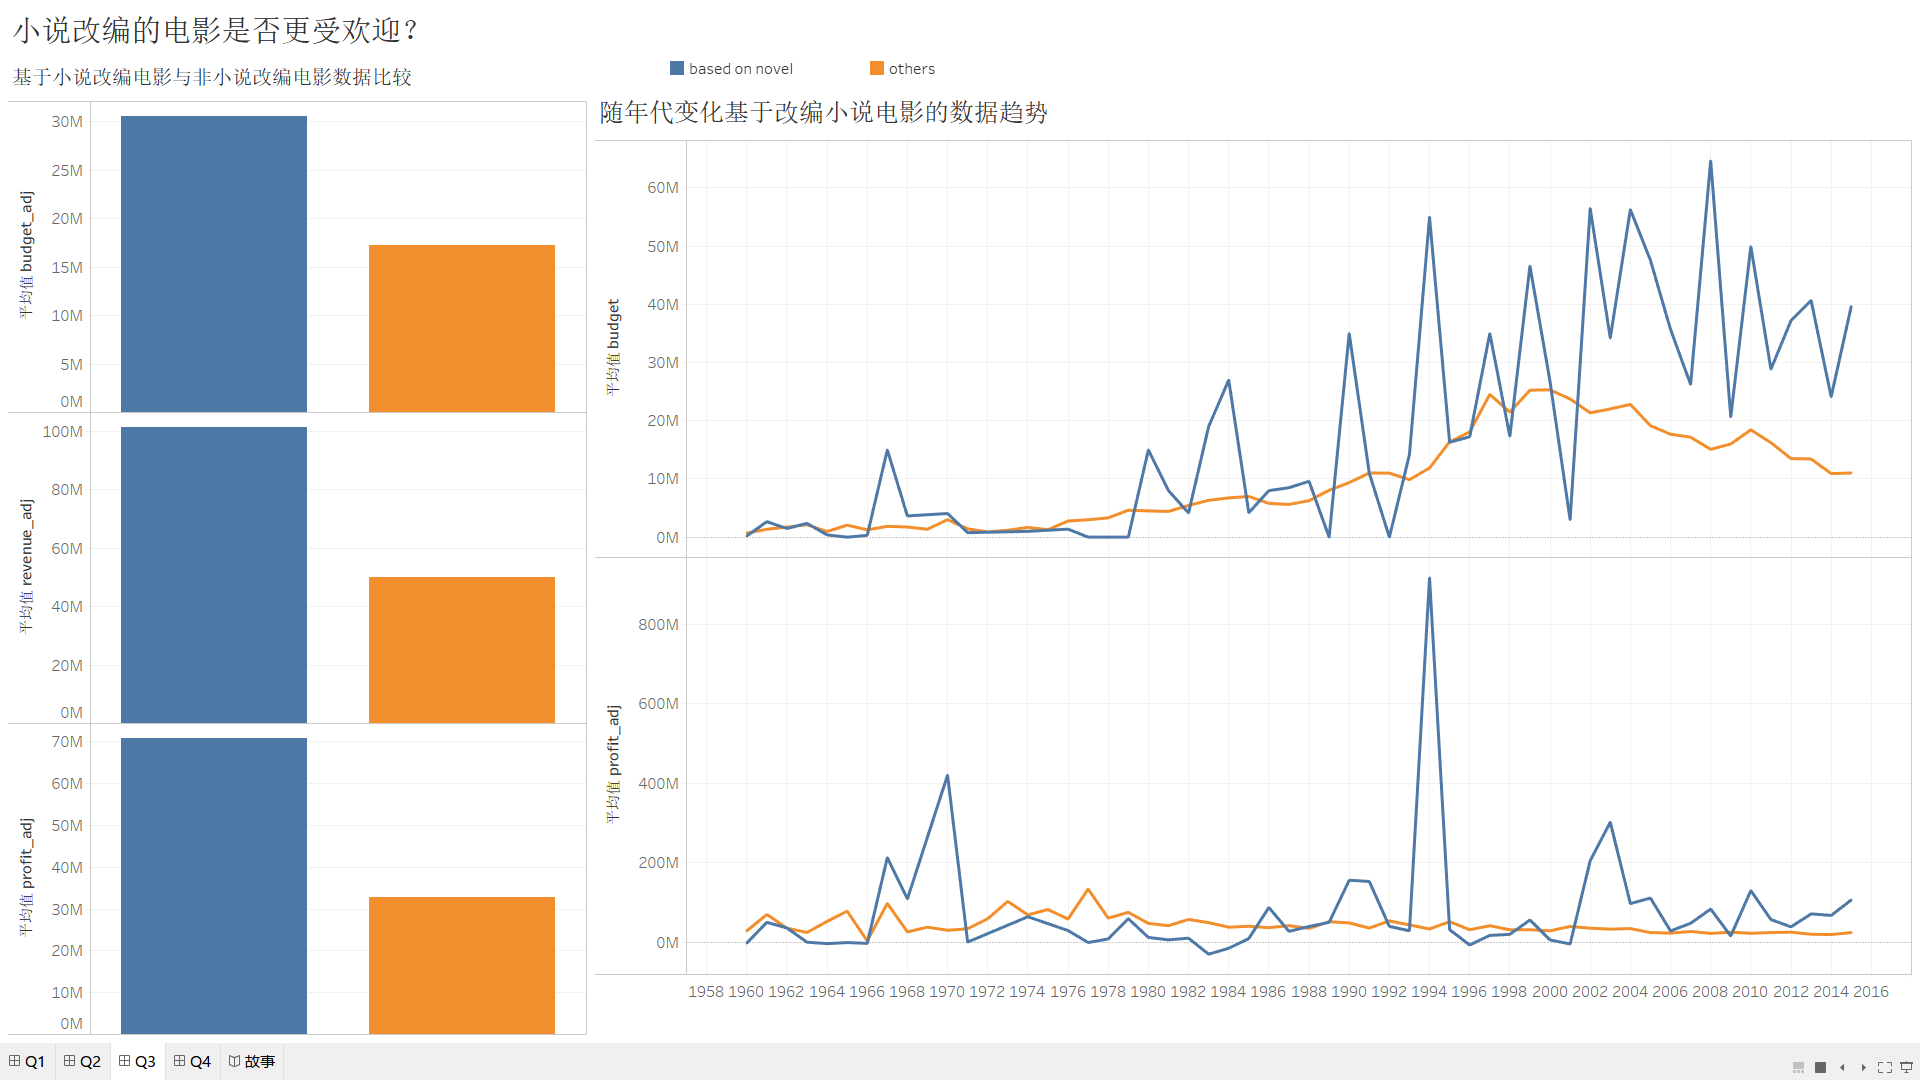
* a. 无论是在预算、收入、和热度，基于小说改编的电影都要比其他非改编电影高很多
* b. 基于小说改编的电影在1994，2003出现了分别出现了巅峰，而且自94年后对于改编小说电影的预算投入也在逐年增长


## 6. 谁是最佳导演？
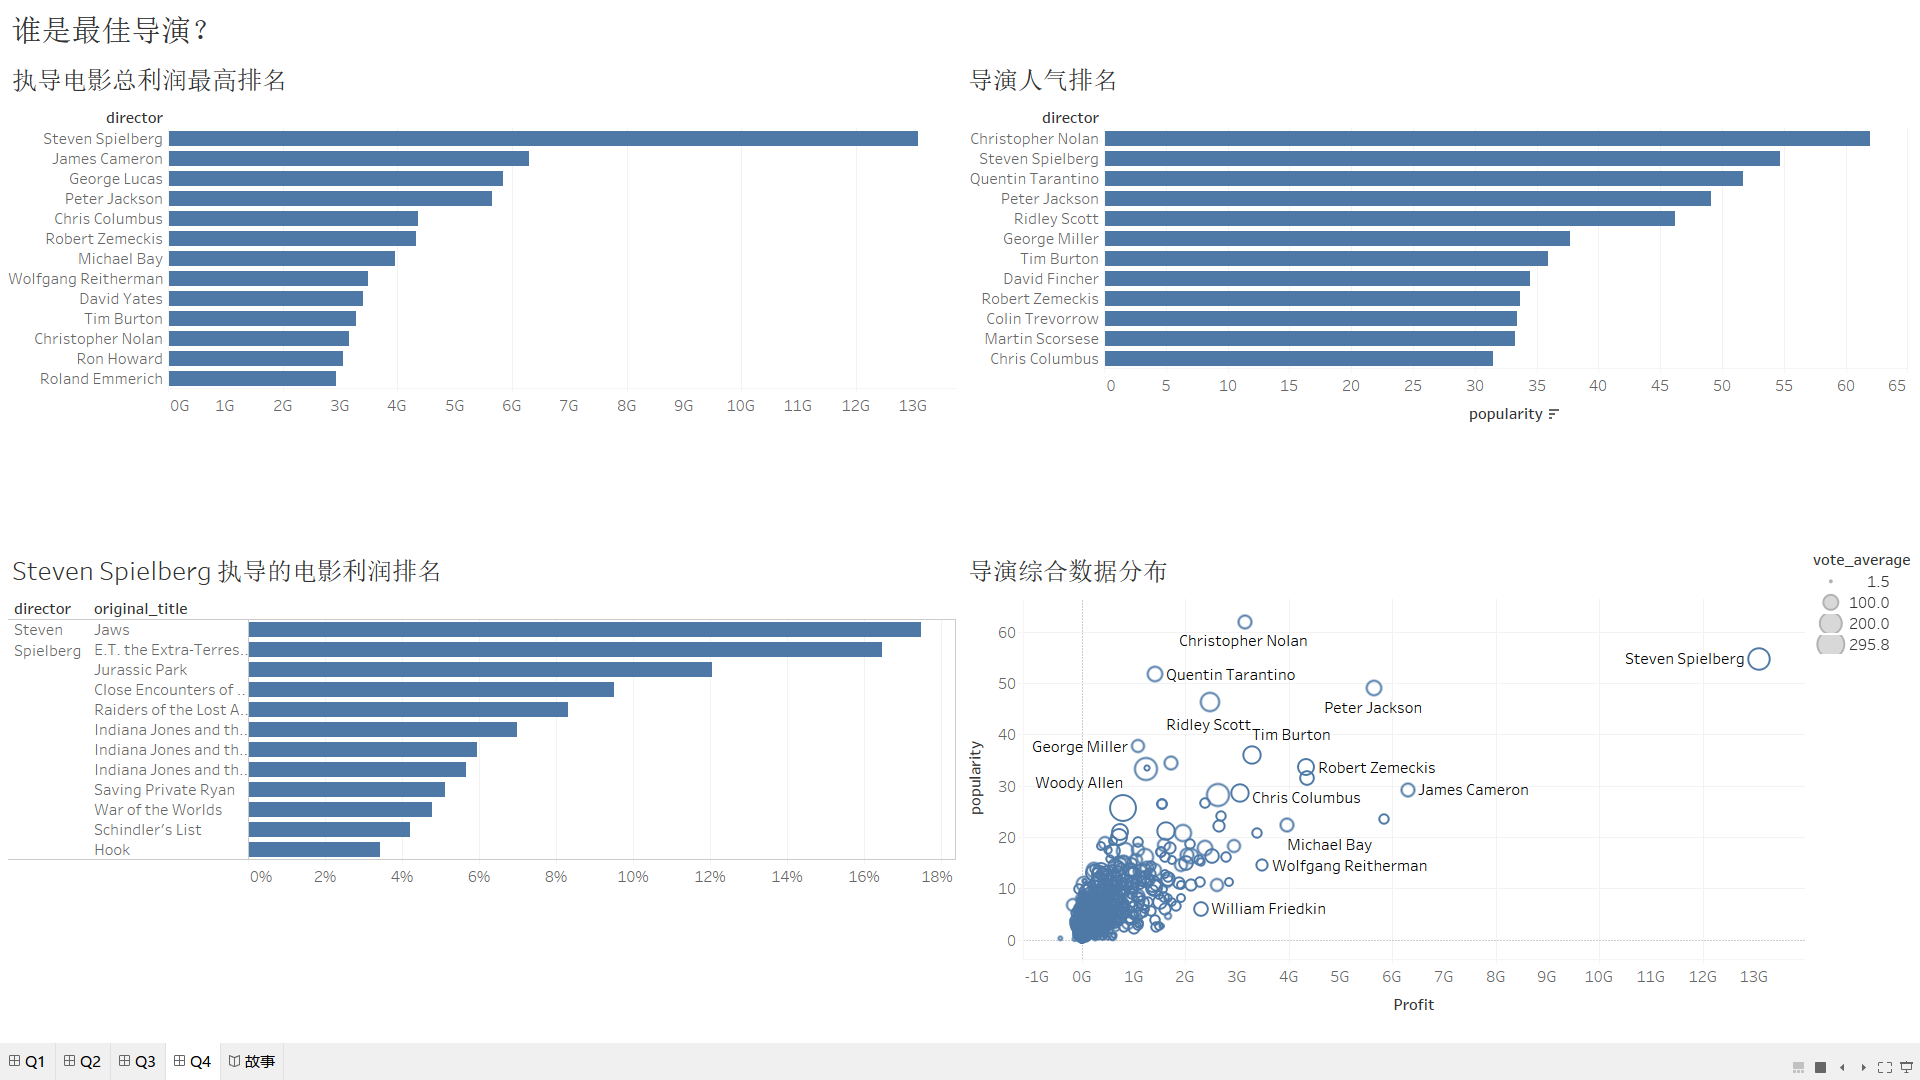
* a. 利润最高的导演是Steven Spielberg，其中他执导的Jaws和ET这两部电影为他贡献了所有利润的27.85%
* b. 相对于人气来说，最高的是Christopher Nolan
* c. 综合比较利润、人气、以及评分，Steven Spielberg 都拥有很高的数据，可以说他是最成功的导演了：）

---
**项目链接**
https://public.tableau.com/views/P3_Q1_0/Q1?:embed=y&:display_count=yes&publish=yes

选择页面下方”元数据“可以切换仪表盘和故事面板

## 附. 数据清理

In [1]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
movies = pd.read_csv('movies.csv')

In [3]:
# 查看数据完整性
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8043 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# 清理缺失的数据
# 对genre 进行处理
# 拆分列
split_genres = movies['genres'].str.split('|', expand = True)
# 把拆分后的几列按id保存回原来的df
split_genres['id'] = movies['id']
merged_back = movies.merge(split_genres)
# 最后用melt() 函数生成新的df
melted = pd.melt(merged_back, id_vars = ['id', 'release_year'], value_vars=[0, 1, 2, 3, 4], value_name = 'genre').drop('variable', axis = 1).dropna()
melted.to_csv('id_year_genre.csv', index = False)

In [5]:
# 对影视公司进行清理
# Q2 需要对比环球影业(Universal Pictures)和派拉蒙影业(Paramount Pictures)的数据，而数据中很多电影是多家电影公司联合出品的，需要切割
split_companies = movies['production_companies'].str.split('|',expand = True)
split_companies['id'] = movies['id']
merged_back_companies = movies.merge(split_companies)

# 用melt()方法生成新的df
melted_companies = pd.melt(merged_back_companies, id_vars = ['id','popularity','budget','revenue','original_title','release_year','vote_count','vote_average'],value_vars = [0, 1, 2, 3, 4], value_name = 'production company').drop('variable', axis = 1).dropna()
melted_companies.to_csv('production_company.csv', index = False)

In [58]:
#####  拆分改编小说与非改编小说的数据
# 新建一列判断是否改编自小说
movies['based on novel'] = movies['keywords'].fillna('NaN')

def based_on_novel(keyword):
    if 'based on novel' in keyword:
        return 'based on novel'
    else:
        return 'others'

movies['based on novel'] = movies['based on novel'].apply(based_on_novel)

In [59]:
movies.to_csv('based_on_novel.csv',index=False)

In [60]:
##### 整理导演的数据
split_director = movies['director'].str.split('|',expand = True)
split_director['id'] = movies['id']
merged_back_director = movies.merge(split_director)

# 用melt()方法生成新的df
melted_director = pd.melt(merged_back_director, id_vars = ['id','popularity','budget_adj','original_title', 'revenue_adj','release_year','vote_count','vote_average'],value_vars = [0, 1, 2, 3, 4], value_name = 'director').drop('variable', axis = 1).dropna()
melted_director.to_csv('director.csv', index = False)